In [36]:
from skimage.measure import compare_ssim as ssim
import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import Image
import glob

In [62]:
band2R = '/Users/Airton/Desktop/b2sparseless/results/weather/test_latest/images/*real_B.png'
band2F = '/Users/Airton/Desktop/b2sparseless/results/weather/test_latest/images/*fake_B.png'
band6R = '/Users/Airton/Desktop/band6/results_test/weather/test_latest/images/*real_B.png'
band6F = '/Users/Airton/Desktop/band6/results_test/weather/test_latest/images/*fake_B.png'
visR = '/Users/Airton/Desktop/visibility/results_test/weather/test_latest/images/*real_B.png'
visF = '/Users/Airton/Desktop/visibility/results_test/weather/test_latest/images/*fake_B.png'

In [4]:
MSE = [] 
SSIM =[]

def mse(imageA, imageB):
    # the 'Mean Squared Error' between the two images is the
    # sum of the squared difference between the two images;
    # NOTE: the two images must have the same dimension
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])
    # return the MSE, the lower the error, the more "similar"
    # the two images are
    return err

In [37]:
run1R = []
for filename in sorted(glob.glob(band6R)):
    im=Image.open(filename).convert('L')
    run1R.append(im)

In [40]:
run1F = []
for filename in sorted(glob.glob(band6F)):
    im=Image.open(filename).convert('L')
    run1F.append(im)

In [41]:
print(len(run1F))
print(len(run1R))

50
50


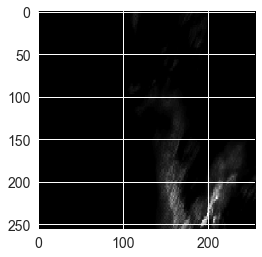

In [42]:
plt.imshow(np.array(run1R[0]),cmap='gray')
plt.show()

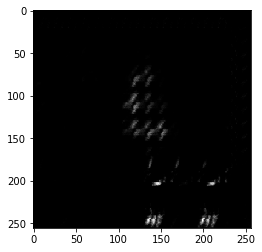

In [9]:
plt.imshow(np.array(run1F[0]),cmap='gray')
plt.show()

In [43]:
MSE = []
SSIM = []
for i in range(len(run1R)):
    m = mse(np.array(run1R[i]),np.array(run1F[i]))
    s = ssim(np.array(run1R[i]),np.array(run1F[i]))
    MSE.append(m)
    SSIM.append(s)

In [44]:
print(MSE)

[434.1396789550781, 330.71934509277344, 159.01068115234375, 266.8730010986328, 324.8627014160156, 214.45687866210938, 158.5467529296875, 365.2859191894531, 252.5334930419922, 464.663330078125, 143.93104553222656, 270.9633331298828, 408.9728546142578, 714.7523956298828, 210.2681884765625, 228.19520568847656, 377.7545928955078, 404.89344787597656, 167.1310272216797, 430.9742431640625, 304.81024169921875, 286.21726989746094, 365.6526794433594, 246.55960083007812, 188.16488647460938, 300.32752990722656, 373.5955047607422, 331.5554962158203, 388.2117156982422, 306.40528869628906, 157.82913208007812, 220.82180786132812, 170.1947021484375, 302.8559112548828, 237.494384765625, 146.17660522460938, 157.8572540283203, 230.80055236816406, 434.0280456542969, 190.90232849121094, 195.40907287597656, 233.8324432373047, 202.7423553466797, 155.1714324951172, 264.5461120605469, 243.69061279296875, 222.349609375, 196.4528045654297, 154.91600036621094, 225.06629943847656]


In [45]:
print(SSIM)

[0.6895074639170672, 0.7523801294408701, 0.7682755220555239, 0.8040079397543956, 0.8520923753721354, 0.8465412111972506, 0.7935563193351945, 0.7051558280131646, 0.738512872671369, 0.7285361600501429, 0.7827372951785422, 0.8394695564660719, 0.7588293674699939, 0.6811421934815545, 0.8078129983389294, 0.7462079825780216, 0.7439698740356109, 0.7865463160977014, 0.8187577960042555, 0.7918247102783698, 0.8040138987640455, 0.8137295564799072, 0.8671705717697529, 0.8173933318597786, 0.8057923991744723, 0.8000977337861274, 0.763616376349508, 0.7707320625467905, 0.8570819368892666, 0.8417059619416746, 0.8352481806691276, 0.790963612646069, 0.8073822677320467, 0.7362950221861017, 0.801577139916217, 0.8034462295053113, 0.8031899697317655, 0.8280161653330185, 0.7140066028850975, 0.804436169752014, 0.7904876359438011, 0.7885880181832116, 0.7743479502420998, 0.7341745045025209, 0.7190117956329426, 0.7579811418705178, 0.771065830855845, 0.7693775108420645, 0.7778089408493793, 0.8114422256740234]


In [46]:
x=list(range(0,50))

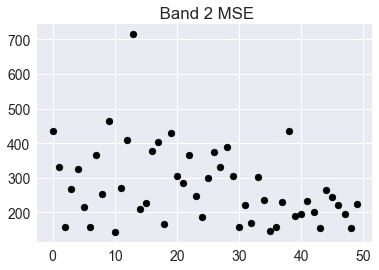

143.93104553222656 714.7523956298828
275.27131591796876


In [47]:
plt.scatter(x,MSE,c='black')
plt.title(" Band 2 MSE")
plt.show()
print(min(MSE),max(MSE))
print(np.mean(MSE))

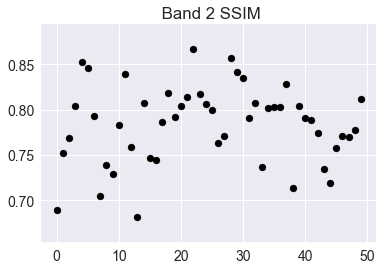

0.6811421934815545 0.8671705717697529
0.7839208931250135


In [48]:
plt.scatter(x,SSIM,c='black')
plt.title(" Band 2 SSIM")
plt.show()
print(min(SSIM),max(SSIM))
print(np.mean(SSIM))

In [49]:
from sklearn.metrics import confusion_matrix

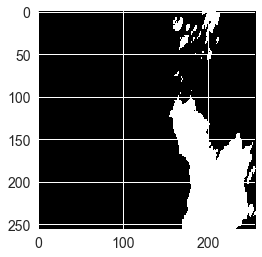

In [50]:
Thr = cv2.threshold(np.array(run1R[1]),1,255,cv2.THRESH_BINARY)
plt.imshow(Thr[1],cmap = 'gray')
plt.show()

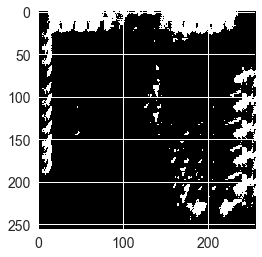

In [51]:
Thf = cv2.threshold(np.array(run1F[1]),1,255,cv2.THRESH_BINARY)
plt.imshow(Thf[1],cmap = 'gray')
plt.show()

In [52]:
Fthr = []
Fthf = []
for i in range(len(run1R)):
    gray_img= np.array(run1R[i])
    gray_img2= np.array(run1F[i])
    th1 = cv2.threshold(gray_img,1,255,cv2.THRESH_BINARY)
    th2 = cv2.threshold(gray_img2,1,255,cv2.THRESH_BINARY)
    Fr = list(th1[1].flatten())
    Ff = list(th2[1].flatten())
    Fthr.append(Fr)
    Fthf.append(Ff)

In [53]:
TN,FP,FN,TP = 0,0,0,0
TN1,FP1,FN1,TP1 = 0,0,0,0

In [54]:
for i in range(len(Fthr)):
    tn,fp,fn,tp=confusion_matrix(Fthr[i], Fthf[i]).ravel()
    TN = TN +tn
    FP = FP +fp
    FN = FN +fn
    TP = TP +tp

In [55]:
Total = TN+FP+FN+TP
TotalP = FN + TP
TotalN = TN + FP
PTN = (TN/Total)*100
PFP = (FP/Total)*100
PFN = (FN/Total)*100
PTP = (TP/Total)*100

In [56]:
PTC = []

In [57]:
PTC.append([PTN,PFP,PFN,PTP])

In [58]:
print(len(PTC))
print(PTC)

1
[[80.2838134765625, 9.95635986328125, 7.669891357421875, 2.089935302734375]]


In [59]:
Correct = PTN + PTP
Wrong = PFN + PFP
print("Correct = ", Correct, " Wrong = ", Wrong)

Correct =  82.37374877929688  Wrong =  17.626251220703125


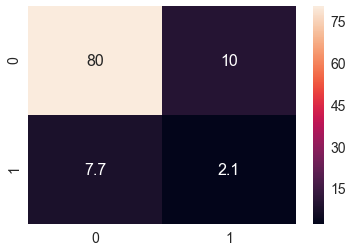

In [60]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

array = [[PTN,PFP],
        [PFN,PTP]]        
df_cm = pd.DataFrame(array, range(2),
                  range(2))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size

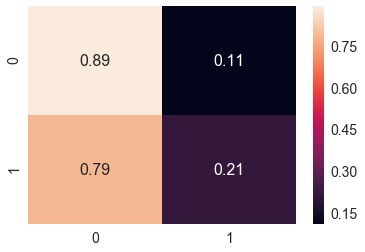

In [61]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

array = [[TN/TotalN,FP/TotalN],
        [FN/TotalP,TP/TotalP]]        
df_cm = pd.DataFrame(array, range(2),
                  range(2))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size